Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
test.shape

(233599, 11)

In [6]:
df = train.append(test)

/var/folders/sr/fs_rp35x0tv980r561l6cfvw0000gn/T/ipykernel_892/1858088059.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
df.drop(['User_ID'],axis=1,inplace =True)

In [9]:
df["Gender"] = df['Gender'].map({'F':0,'M':1})
#df.gender.replace(['M','F'],[1,0] inplace =True)

In [10]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
#targeet guiding kyunki age ko one hot encoding se frequency ka pata nhi chalega
df["Age"] = df['Age'].map({'0-17':1,'18-25':2,'55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4,})


In [12]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
df.City_Category

0         A
1         A
2         A
3         A
4         C
         ..
233594    B
233595    B
233596    B
233597    C
233598    B
Name: City_Category, Length: 783667, dtype: object

In [14]:
df['City_Category'] = df['City_Category'].map({'A':0,'B':1,'C':2})


In [15]:
df.groupby(['Occupation']).size()

Occupation
0      98850
1      67687
2      37996
3      25126
4     103086
5      17373
6      29102
7      84127
8       2189
9       8929
10     18304
11     16593
12     44448
13     11053
14     38782
15     17356
16     36122
17     57418
18      9367
19     11919
20     47840
dtype: int64

In [16]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [17]:
#replace missing values
df.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [18]:
#replace the missing values with mode
df['Product_Category_2'].mode()[0]

8.0

In [19]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [20]:
df['Product_Category_3'].mode()

0    16.0
Name: Product_Category_3, dtype: float64

In [21]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [22]:
df['Stay_In_Current_City_Years'].unique()


array(['2', '4+', '3', '1', '0'], dtype=object)

In [23]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


/var/folders/sr/fs_rp35x0tv980r561l6cfvw0000gn/T/ipykernel_892/1612830013.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [24]:
#convert object into intiger
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

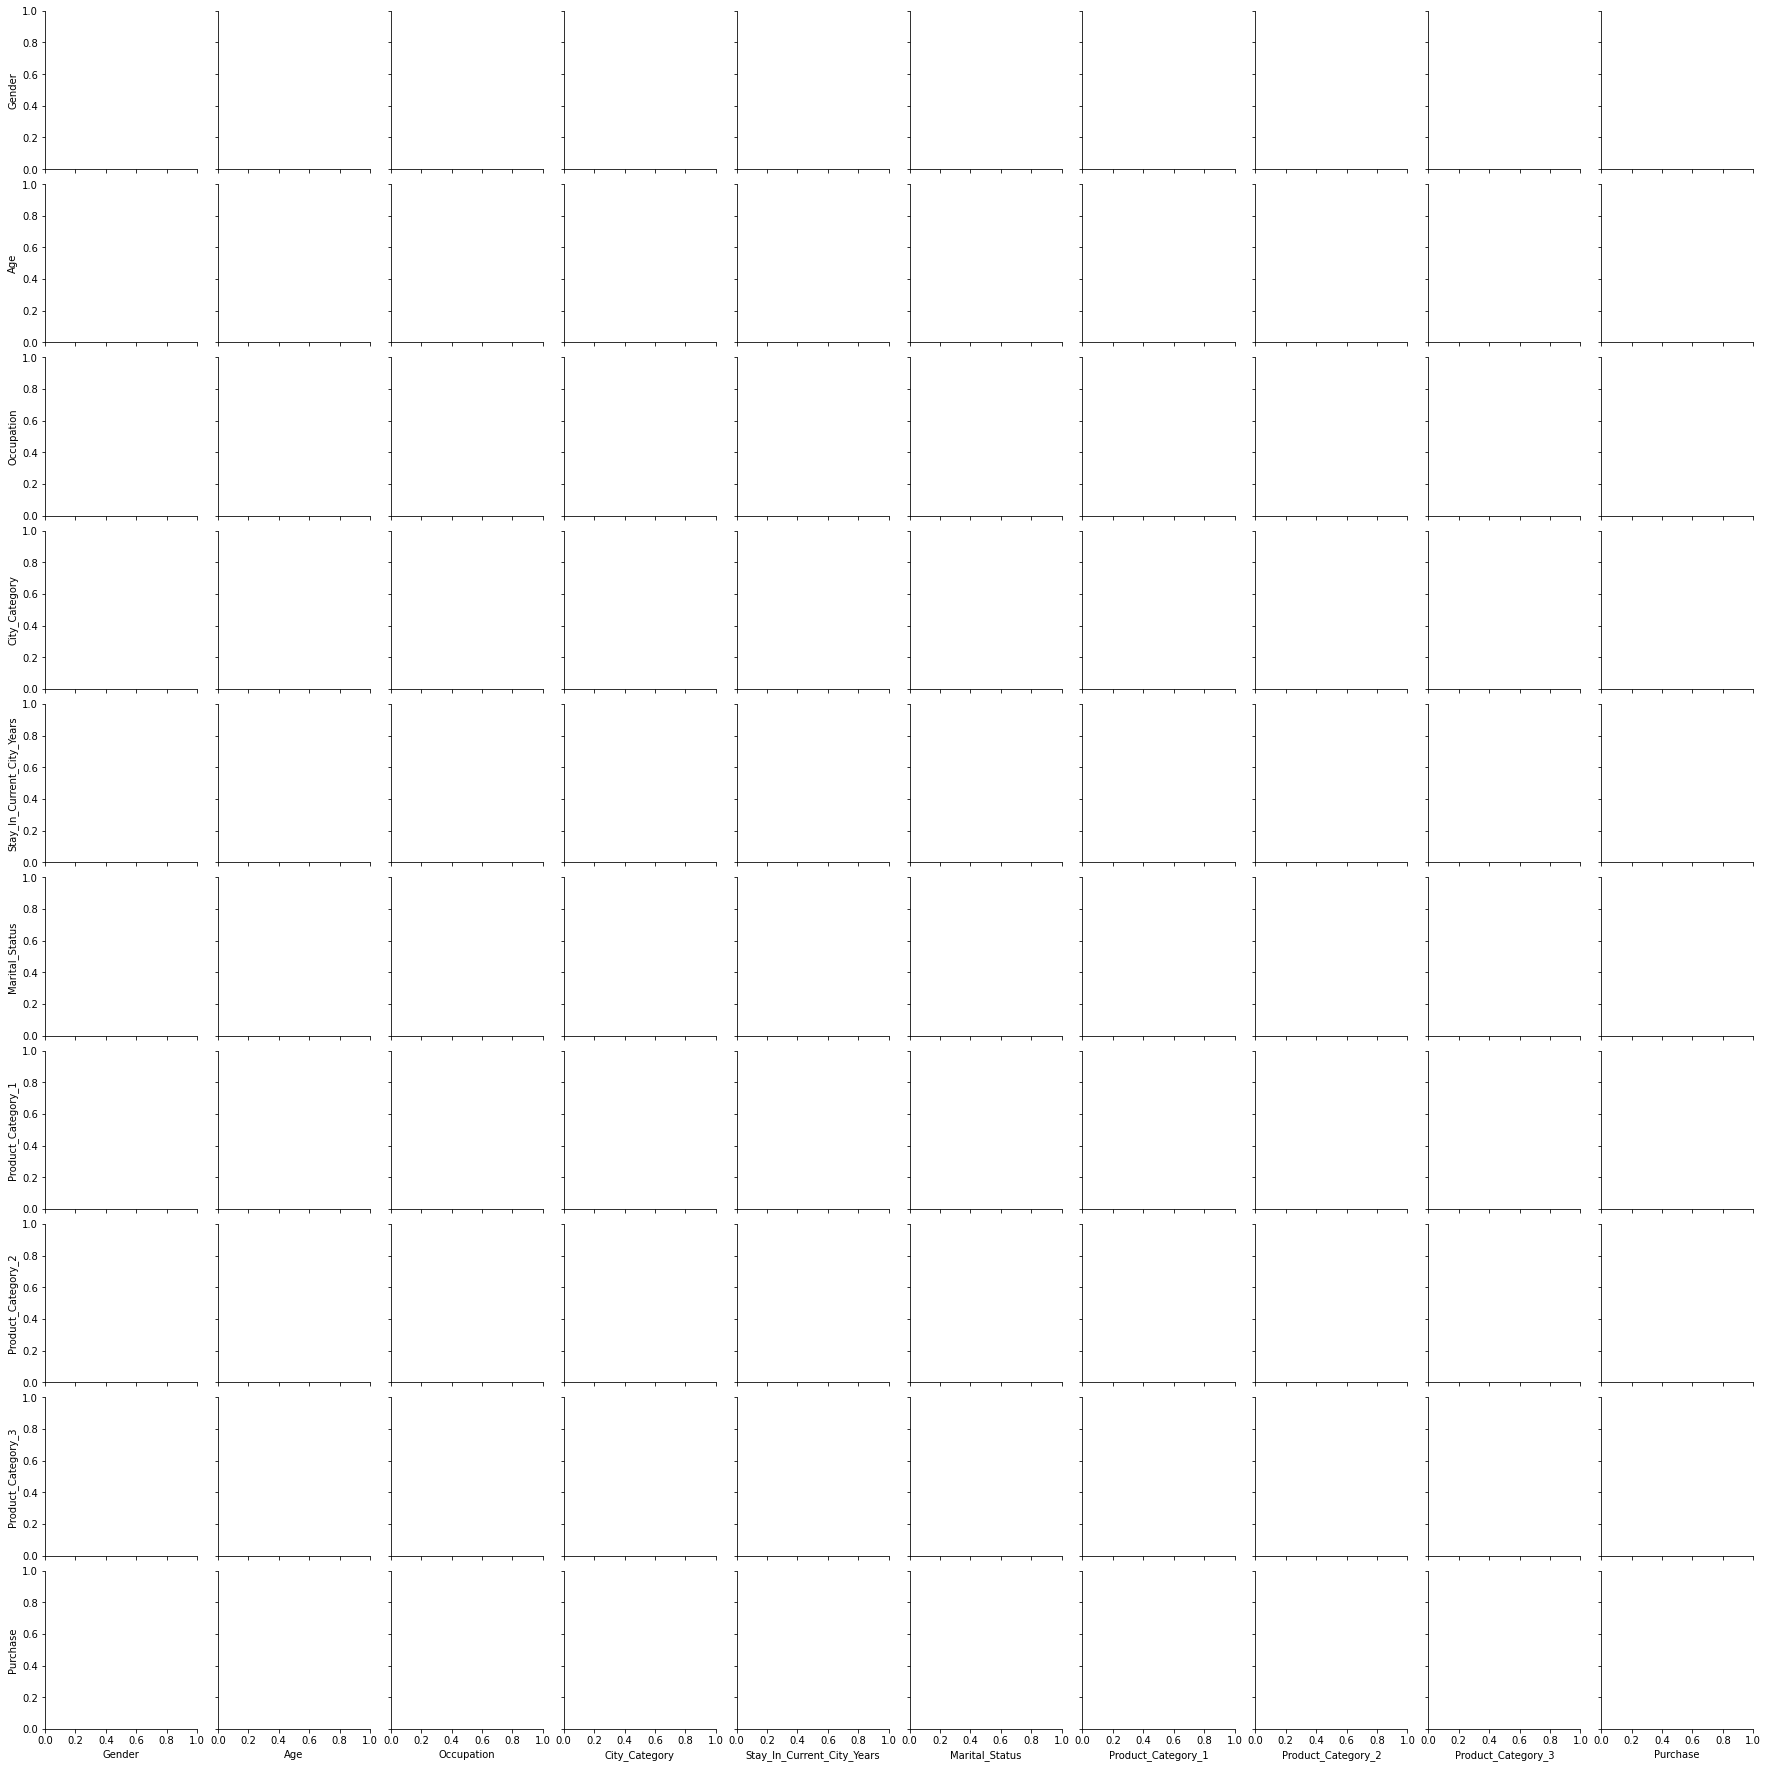

In [25]:
sns.pairplot(df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

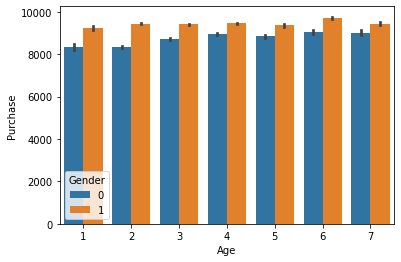

In [27]:
sns.barplot('Age','Purchase', hue='Gender',data=df)
# all age groups male purchase more than the girls

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

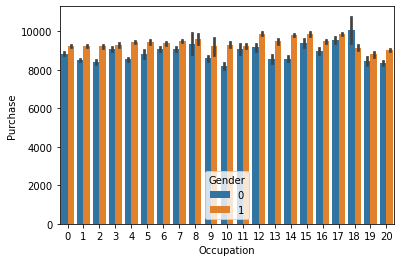

In [29]:
sns.barplot('Occupation','Purchase', hue='Gender',data=df)

TypeError: float() argument must be a string or a real number, not 'AxesSubplot'

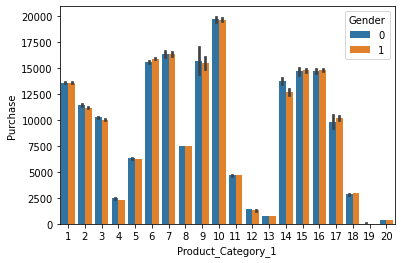

In [32]:
plt.plot(sns.barplot('Product_Category_1','Purchase', hue='Gender',data=df))



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: float() argument must be a string or a real number, not 'AxesSubplot'

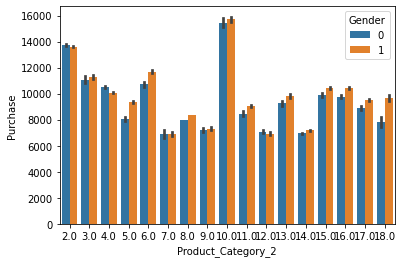

In [33]:
plt.plot(sns.barplot('Product_Category_2','Purchase', hue='Gender',data=df))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: float() argument must be a string or a real number, not 'AxesSubplot'

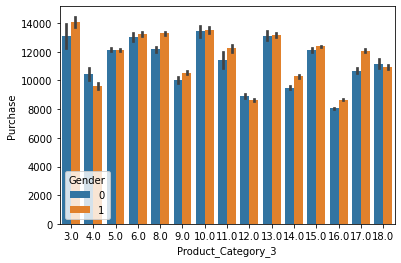

In [34]:
plt.plot(sns.barplot('Product_Category_3','Purchase', hue='Gender',data=df))


In [35]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,2,4,0,8,8.0,16.0,7969.0


In [37]:
~df['Purchase'].isnull()

0          True
1          True
2          True
3          True
4          True
          ...  
233594    False
233595    False
233596    False
233597    False
233598    False
Name: Purchase, Length: 783667, dtype: bool

In [40]:
df_test = df[df['Purchase'].isnull()]
df_test.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,5,7,1,2,1,1,11.0,16.0,NaN
1,P00113442,1,3,17,2,0,0,3,5.0,16.0,NaN
2,P00288442,0,4,1,1,4,1,5,14.0,16.0,NaN
3,P00145342,0,4,1,1,4,1,4,9.0,16.0,NaN
4,P00053842,0,3,1,2,1,0,4,5.0,12.0,NaN


In [42]:
df_train = df[~df['Purchase'].isnull()]
df_train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,2,4,0,8,8.0,16.0,7969.0


In [45]:
X = df_train.drop('Purchase',axis =1)
y = df_train['Purchase']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [47]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [49]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)